# Learning to Control Indoor Air Temperature in Buildings With Primal-Dual DDPG and Differentiable Predictive Control

This notebook demonstrates and compares two advanced methods for controlling indoor air temperature in a single-zone building:
- **Primal-Dual Deep Deterministic Policy Gradient (PD-DDPG)**: A reinforcement learning method tailored for constrained optimization in dynamic environments.
- **Differentiable Predictive Control (DPC)**: A model-based offline policy optimization approach leveraging differentiable system dynamics.
---
## Motivation
Buildings today contribute to roughly 40% of the global energy use (approx. 64 PWh), of which a large portion is used for [heating, cooling, ventilation, and air-conditioning (HVAC)](https://en.wikipedia.org/wiki/Heating,_ventilation,_and_air_conditioning) [4]. It has been demonstrated that advanced building control, like [model predictive control (MPC)](https://en.wikipedia.org/wiki/Model_predictive_control)
or [deep reinforcement learning (DRL)](https://en.wikipedia.org/wiki/Deep_reinforcement_learning), can notably reduce the energy use and mitigate greenhouse gas emissions. However, despite intensive research efforts, the practical applications are still in the early stages. One of these challenges is the complexity of the optimal control technology to be deployed in the current predominantly rule-based [building automation systems](https://en.wikipedia.org/wiki/Building_automation).

  
Below is a simplified representation of a building control scheme governed by advanced optimization algorithms:
<img src="./figs/building_control.PNG" width="500">

---
## Objectives
1. Train a PD-DDPG agent for building temperature regulation task.
2. Implement DPC for the same problem and compare:
   - Energy consumption.
   - Temperature constraint violations.
   - Training time.
3. Provide insights into the strengths and weaknesses of both methods.
---
## Differentiable Predictive Control (DPC)

[Differentiable Predictive Control](https://www.sciencedirect.com/science/article/pii/S0959152422000981) (DPC) is a model-based offline optimization algorithm that leverages differentiable system models to train constrained control policies. 

**Key Features of DPC**:
- **Differentiable system model**:  
The DPC is a model-based policy optimization algorithm, that exploits the differentiability of a wide class of model representations for dynamical systems, including differential equations, state-space models, or various neural network architectures. In this example, we compactly represent the system model by ODE equations  $\text{ODESolve}(f(x^i_k, u^i_k))$  describing the governing dynamics of the controlled system. 
- **Constrained Neural Policy**: Learns a control policy $u_k = \pi(x_k, R, d)$ that minimizes energy use while ensuring temperature constraints are satisfied. The policy uses:
  - $x_k$: System states (e.g., indoor temperature).
  - $R$: Reference trajectory (temperature bounds over the prediction horizon).
  - $d_k$: Disturbances (e.g. Solar radiation)
- **Optimization Problem**: Solves a parametric optimization problem to minimize the tracking error and energy use:
  $$
\begin{align}
&\underset{\theta}{\text{minimize}}     && \sum_{i=1}^m  \Big( \sum_{k=1}^{N-1} Q_x||x^i_k - r^i_k||_2^2  + Q_N||u^i_k||_2^2 \Big) \\
&\text{subject to}    && x^i_{k+1} =  \text{ODESolve}(f(x^i_k, u^i_k)) \\
&                     && u^i_k = \pi_{\theta}(x^i_k, R^i, d^i_k) \\
&                     && 0 \le x^i_k \le 1 \\
&                     && 0 \le u^i_k \le 1 \\
&                     && x^i_0 \sim \mathcal{P}_{x_0} \\
&                     && R^i \sim  \mathcal{P}_R
\end{align}
$$  

DPC combines the advantages of model-based optimization with neural network policy flexibility, making it a powerful tool for control tasks like building temperature regulation.
- **Schematics of the Differentiable Predictive Control method [[1]](https://www.sciencedirect.com/science/article/pii/S0959152422000981)**:  

<p align="center">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0959152422000981-gr4_lrg.jpg" width="500">  
</p>

---


## Primal-Dual Deep Deterministic Policy Gradient (PD-DDPG)

[PD-DDPG](https://arxiv.org/abs/1802.06480) is a reinforcement learning algorithm designed to handle **Constrained Markov Decision Processes (CMDPs)**. It extends the [Deep Deterministic Policy Gradient (DDPG)](https://arxiv.org/abs/1509.02971) method by incorporating a primal-dual optimization framework to address constraints.
PD-DDPG excels in scenarios with hard constraints, such as maintaining temperature within predefined comfort bounds while minimizing energy use. We will explain the mathematical details further during the coding sections of this algorithm.



---
## Expected Outcomes
- A fair comparison of PD-DDPG and DPC for building control tasks.
- Recommendations for future improvements in these methods.
- Insights into the trade-offs between RL and model-based control approaches.
---
## References
### DPC References
[1] [Ján Drgoňa, Karol Kiš, Aaron Tuor, Draguna Vrabie, Martin Klaučo,
Differentiable predictive control: Deep learning alternative to explicit model predictive control for unknown nonlinear systems,
Journal of Process Control, Volume 116, 2022](https://www.sciencedirect.com/science/article/pii/S0959152422000981)  
[2] [Jan Drgona, Aaron Tuor, Draguna Vrabie, Learning Constrained Adaptive Differentiable Predictive Control Policies With Guarantees, 2020, arXiv:2004.11184](https://arxiv.org/abs/2004.11184)  
[3] [Ján Drgoňa, Aaron Tuor, Elliott Skomski, Soumya Vasisht, Draguna Vrabie,
Deep Learning Explicit Differentiable Predictive Control Laws for Buildings,
IFAC-PapersOnLine,
Volume 54, Issue 6,
2021](https://www.sciencedirect.com/science/article/pii/S2405896321012933)

### Related Building Control References
[4] [Ján Drgoňa, Javier Arroyo, Iago Cupeiro Figueroa, David Blum, Krzysztof Arendt, Donghun Kim, Enric Perarnau Ollé, Juraj Oravec, Michael Wetter, Draguna L. Vrabie, Lieve Helsen,
All you need to know about model predictive control for buildings,
Annual Reviews in Control,
Volume 50,
2020](https://www.sciencedirect.com/science/article/pii/S1367578820300584)  
[5] [Ján Drgoňa, Damien Picard, Lieve Helsen,
Cloud-based implementation of white-box model predictive control for a GEOTABS office building: A field test demonstration,
Journal of Process Control,
Volume 88,
2020](https://www.sciencedirect.com/science/article/pii/S0959152419306857)  
[6] [Zoltan Nagy, Gregor Henze, Sourav Dey, Javier Arroyo, Lieve Helsen, Xiangyu Zhang, Bingqing Chen, Kadir Amasyali, Kuldeep Kurte, Ahmed Zamzam, Helia Zandi, Ján Drgoňa, Matias Quintana, Steven McCullogh, June Young Park, Han Li, Tianzhen Hong, Silvio Brandi, Giuseppe Pinto, Alfonso Capozzoli, Draguna Vrabie, Mario Bergés, Kingsley Nweye, Thibault Marzullo, Andrey Bernstein,
Ten questions concerning reinforcement learning for building energy management,
Building and Environment,
Volume 241,
2023](https://www.sciencedirect.com/science/article/abs/pii/S0360132323004626)  
[7] [Bingqing Chen, Priya L. Donti, Kyri Baker, J. Zico Kolter, and Mario Bergés. 2021. Enforcing Policy Feasibility Constraints through Differentiable Projection for Energy Optimization. In Proceedings of the Twelfth ACM International Conference on Future Energy Systems (e-Energy '21)](https://dl.acm.org/doi/abs/10.1145/3447555.3464874)  
[8] [Jan Široký, Frauke Oldewurtel, Jiří Cigler, Samuel Prívara,
Experimental analysis of model predictive control for an energy efficient building heating system,
Applied Energy,
Volume 88, Issue 9,
2011](https://www.sciencedirect.com/science/article/pii/S0306261911001668)


### Related Deep Reinforcement Learning References
[9] [Liang Q, Que F, Modiano E. Accelerated primal-dual policy optimization for safe reinforcement learning. arXiv preprint arXiv:1802.06480. 2018 Feb 19.](https://arxiv.org/abs/1802.06480)  
[10] [Lillicrap TP. Continuous control with deep reinforcement learning. arXiv preprint arXiv:1509.02971. 2015.](https://arxiv.org/abs/1509.02971)


## For Colab only:

In [ ]:
!pip install neuromancer gym

In [1]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
from collections import deque
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## Generating Training Data for RL and DPC Controllers

The `generate_data()` function simulates the dynamics of a single-zone building, enabling the creation of structured datasets for reinforcement learning (RL) agents and Dynamic Programming Controllers (DPC). The function relies on a **linear state-space model** to approximate the behavior of the building:

$$
x_{t+1} = A \, x_t + B \, u_t + E \, d_t, \quad y_t = C \, x_t,
$$

where:
- **`x_t`**: State vector (e.g., indoor temperature).
- **`u_t`**: Control action (bounded by `umin` and `umax`).
- **`d_t`**: External disturbances (e.g., outdoor temperature, solar radiation).
- **`A`, `B`, `C`, `E`**: System matrices describing the dynamics.

---

### Steps in `generate_data()`

1. **System Initialization**: The `LinearSimpleSingleZone` model is loaded from Neuromancer to extract matrices (`A`, `B`, `C`, `E`) and control bounds (`umin`, `umax`).
2. **Helper Function (`create_dataset`)**:
   - Generates references (`ymin`, `ymax`) for target temperature ranges.
   - Samples disturbance trajectories (`d`) and initial conditions (`x0`).
   - Returns a structured `DictDataset` for training or validation.
3. **Dataset Creation**:
   - `train_data`: Dataset for training, using `ref_range` as the reference offset.
   - `dev_data`: Dataset for validation, using the same reference offset.
4. **Data Loaders**:
   - Converts `train_data` and `dev_data` into PyTorch data loaders for batch processing.
5. **Normalization Statistics**:
   - Computes mean and standard deviation for features (`x`, `ymin`, `ymax`, `d`) to normalize the data during training.

---

### Outputs

1. **`problem_specs`**: Contains system properties like state dimensions, control bounds, and system matrices.
2. **`data_stats`**: Mean and standard deviation for normalization.
3. **`data`**: Includes structured `train_data` and `dev_data` datasets.
4. **`data_loader`**: PyTorch data loaders for efficient batch access.

---

### Example

```python
problem_specs, data_stats, data, data_loader = generate_data(
    nsteps=50, n_samples=100, x_min=18.0, x_max=24.0, ref_range=2.0, batch_size=32
)
```

In [2]:
import neuromancer.psl as psl
from neuromancer.dataset import DictDataset
import torch

def generate_data(nsteps, n_samples, x_min, x_max, ref_range, batch_size):
    sys = psl.systems['LinearSimpleSingleZone']()
    
    # Extract system dynamics and dimensions
    A, B, C, E = map(torch.tensor, (sys.params[2]['A'], sys.params[2]['Beta'], sys.params[2]['C'], sys.params[2]['E']))
    umin, umax = torch.tensor(sys.umin), torch.tensor(sys.umax)
    nx, nu, nd, ny, nref = sys.nx, sys.nu, E.shape[1], sys.ny, sys.ny
    
    problem_specs = {
        "nx": nx, "nu": nu, "nd": nd, "ny": ny, "nref": nref,
        "umin": umin, "umax": umax, "A": A, "B": B, "C": C, "E": E
    }

    # Helper function to generate dataset
    def create_dataset(ref_offset, num_samples, name):
        ymin = torch.cat([
            x_min + (x_max - x_min) * torch.rand(1, 1) * torch.ones(nsteps, nref)
            for _ in range(num_samples)
        ]).reshape(num_samples, nsteps, nref)
        ymax = ymin + ref_offset
        dist = torch.stack([torch.tensor(sys.get_D(nsteps)) for _ in range(num_samples)], dim=0)
        x0 = torch.stack([torch.tensor(sys.get_x0().reshape(1, nx)) for _ in range(num_samples)], dim=0)
        return DictDataset({'x': x0, 'ymin': ymin, 'ymax': ymax, 'd': dist}, name=name)
    
    # Generate training and development datasets
    train_data = create_dataset(ref_range, n_samples, "train")
    dev_data = create_dataset(ref_range, n_samples // 10, "dev")
    
    # Data loaders
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                               collate_fn=train_data.collate_fn, shuffle=False)
    dev_loader = torch.utils.data.DataLoader(dev_data, batch_size=batch_size,
                                             collate_fn=dev_data.collate_fn, shuffle=False)
    
    # Normalization statistics
    all_data = train_data.datadict  # Access the internal data dictionary directly
    means = {k: v.mean(dim=[0, 1]) for k, v in all_data.items()}
    stds = {k: v.std(dim=[0, 1]) for k, v in all_data.items()}
    
    data_stats = {"means": torch.cat(list(means.values())), "stds": torch.cat(list(stds.values()))}
    data = {"train_data": train_data, "dev_data": dev_data}
    data_loader = {"train_loader": train_loader, "dev_loader": dev_loader}
    
    return problem_specs, data_stats, data, data_loader


## SimpleBuildingEnv: A Custom Gym Environment for Indoor Temperature Control

`SimpleBuildingEnv` is a custom reinforcement learning (RL) environment built on [OpenAI Gym](https://www.gymlibrary.dev/index.html) to regulate indoor temperature efficiently. RL works by training an agent to interact with an environment, learn through trial and error, and optimize its actions to maximize rewards over time. Each RL problem is unique, so we define custom environments like this one to capture specific dynamics and constraints.

---


### RL Terminology:
- **Agent**: The decision-maker that takes actions in the environment.
- **Environment**: The system the agent interacts with, defined by states, actions, and rewards.
- **State**: The current representation of the system (e.g., indoor temperature, disturbances in our case).
- **Action**: A decision made by the agent (e.g., adjusting HVAC controls).
- **Reward**: Feedback given to the agent for its actions on how well its performing (e.g., penalizing energy usage).
- **Cost (in Safe RL)**: Feedback that measures how much the agent's actions violate safety constraints. Unlike rewards, which the agent seeks to maximize, costs are minimized to ensure the agent's behavior adheres to safety or operational limits (e.g., maintaining temperature within comfortable bounds).
- **Policy**: The agent’s strategy for selecting actions based on the current state.

This environment uses a linear state-space model for building dynamics and leverages the `generate_data()` function to create realistic training datasets for RL agents and controllers.



### How RL Works

The agent interacts with the environment in a loop:

1. **Observation**: The agent observes the current state of the environment (e.g., indoor temperature and external disturbances).
2. **Action Selection**: Based on the current state, the agent selects an action (e.g., adjusting HVAC power).
3. **Transition**: The environment transitions to a new state based on the action and its internal dynamics.
4. **Getting Reward**: The agent receives feedback on its action's effectiveness (e.g., minimizing energy usage while maintaining comfort).
5. **Policy Update**: The agent evaluates and improves its decision-making policy using collected rewards.

This process is illustrated in the diagram below:


<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*G-_27UjSJpZ7nY19w7OOCg.png" width="500">
</p>



---

> **Note:** <span>In this tutorial, we use a custom decorator to split class definitions across cells, making the code modular and allowing markdown explanations between methods for clarity. To add methods to a class, apply the custom decorator right before the method definition:</span>

```python
@add_to_class(ClassName)
def method_name(self):
    # Method implementation
    pass
```


In [3]:
def add_to_class(cls):
    def decorator(func):
        setattr(cls, func.__name__, func)
        return func
    return decorator

## Initialization of SimpleBuildingEnv

1. **Inputs**:
   - **`problem_specs`**: Defines system-specific properties such as state-space matrices, control input bounds, and dimensions.
   - **`train_data`**: Provides sampled data for initial states, disturbances, and reference temperature bounds.
   - **`data_stats`**: Contains mean and standard deviation values for normalizing the state observations.

2. **Action Space**:
   - A single scalar action (e.g., heating or cooling intensity) is defined within the range `[0, 1]`, scaled appropriately using `problem_specs['umax']`.

3. **Observation Space**:
   - The observation includes the state of the system (`nx`), disturbances (`nd`), and reference temperature bounds (`nref`).
   - It is represented as a continuous space with infinite bounds to accommodate varying inputs.




In [4]:
import gym
from gym import spaces

In [5]:
class SimpleBuildingEnv(gym.Env):
    """Custom Environment for controlling the building indoor temperature using reinforcement learning."""

    def __init__(self, problem_specs, train_data, data_stats):
        super().__init__()
        
        #Get the problem data and data statistics
        self.state_means, self.state_stds = data_stats["means"], data_stats["stds"]
        self.train_data = train_data
        self.problem_specs = problem_specs
        self.t = 0      #Initialize the timestep
        self.idx = 0    #Initialize the batch index in training data

        # Define action space: a single scalar action in [0, 1]
        self.action_space = spaces.Box(
            low=np.array([0.]),
            high=np.array([1.]),
            dtype=np.float32,
            shape=(self.problem_specs['nu'],)
        )

        # Define observation space
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            dtype=np.float32,
            shape=(
                self.problem_specs['nx'] + self.problem_specs['nd'] + self.problem_specs['nref'] * 2,
            )
        )


#### Method: `reset`

These methods provide essential functionality for resetting the environment and calculating feedback for the RL agent.

The `reset` method initializes the environment at the start of an episode:
1. **Initialization**: Selects the sample from `train_data` based on the current index for the initial state, disturbances, and reference bounds.
2. **Reset Variables**: Resets the timestep (`t`) to 0 and `done` flag to `False`
3. **Build State**: Constructs the normalized initial observation by calling the method `build_state()`.
4. **Return**: Provides the initial observation.


In [6]:
@add_to_class(SimpleBuildingEnv)
def reset(self):
    self.done = False
    self.x = self.train_data[self.idx]['x']
    self.y = self.x @ self.problem_specs['C'].T
    self.d = self.train_data[self.idx]['d']
    self.ymin = self.train_data[self.idx]['ymin']
    self.ymax = self.train_data[self.idx]['ymax']
    self.t = 0
    obs = self.build_state()
    return obs

#### Method: `build_state`

The `build_state` method constructs the current state of the environment for the RL agent by combining various components of the system and normalizing them. This method ensures the agent receives a well-structured and scaled observation for training.

#### Steps:
1. **Combine Observations**:
   - The method concatenates the following:
     - Current system state (`self.x`)
     - Reference temperature bounds (`self.ymin` and `self.ymax`)
     - Current disturbance values (`self.d[self.t]`).

2. **Normalize the State**:
   - The combined observation is normalized using the mean and standard deviation values (`self.state_means`, `self.state_stds`) provided during initialization.

To add this method to the `SimpleBuildingEnv` class, we use the decorator `add_to_class(ClassName)` 


In [7]:
@add_to_class(SimpleBuildingEnv)
def build_state(self):
    combined_obs = torch.concat((self.x.squeeze(dim=0), self.ymin[self.t], self.ymax[self.t], self.d[self.t]))
    # # Normalize the state
    normalized_obs = (combined_obs - self.state_means) / self.state_stds
    
    return normalized_obs

#### Methods `get_reward`, `get_cost`:
The `get_reward` method computes the reward for the agent's action which is the energy consumption,  and the `get_cost` method penalizes deviations from the reference bounds (ymin, ymax).


In [8]:
@add_to_class(SimpleBuildingEnv)
def get_reward(self, action):
    """Calculate the reward based on the action."""
    reward = - (action * 0.01) * self.problem_specs['umax'].numpy()
    return reward

@add_to_class(SimpleBuildingEnv)
def get_cost(self, output):
    """Calculate the cost based on the output."""
    cost = (np.maximum(self.ymin[self.t].numpy() - output.numpy(), 0) + np.maximum(output.numpy() - self.ymax[self.t].numpy(), 0)) * 50.0
    return cost

#### Method: `step`

The `step` method updates the environment's state based on the agent's action and calculates feedback for learning.

#### Steps:
1. **Scale the Action**: Converts the agent's action to the appropriate scale using `umax`.
2. **Simulate the Next State**: Updates the state (`x`) and output (`y`) using state-space equations.
3. **Calculate Feedback**:
   - **Reward**: Energy consumption (`u`).
   - **Cost**: Penalizes deviations from desired temperature bounds.
4. **Advance Time**: Updates the timestep and handles data resets when the trajectory ends.
5. **Return**: Provides the next state, reward, cost, and a `done` flag indicating whether the episode ends or not.

> **Note:** <span>This part of the code is for checking if the episode ends or not, and transfering to the next batch of training data:</span>

```python
if self.t == len(self.train_data[0]['d']):
        done = True
        self.idx = (self.idx+1)%len(self.train_data)
        self.d = self.train_data[self.idx]['d']
        self.t = 0
```




In [9]:
@add_to_class(SimpleBuildingEnv)
def step(self, action):
    """Take a step in the environment by the given action. Returns the next state, reward, cost. """
    
    # Scale the action
    scaled_action = torch.tensor(action) * self.problem_specs['umax']
    scaled_action = scaled_action.to(torch.float32)

    # Simulate the next state
    self.x = self.x @ self.problem_specs["A"].T + scaled_action @ self.problem_specs["B"].T + self.d[self.t] @ self.problem_specs["E"].T
    self.y = self.x @ self.problem_specs["C"].T

    # Calculate reward and cost
    reward = self.get_reward(action)
    cost = self.get_cost(self.y)
    
    # update the timestep 
    self.t += 1
    
    done = False
    
    if self.t == len(self.d):
        done = True
        self.idx = (self.idx+1)%len(self.train_data)
        self.d = self.train_data[self.idx]['d']
        self.t = 0
        
    next_obs = self.build_state()
    
    return next_obs, reward, cost, done


#### Method `inference()`:

The `inference` method evaluates a trained policy by simulating its performance in the environment for a continuous trajectory and logging key metrics.

#### Steps:

1. **Initialization**:
   - Reset the environment state with `inf_data`.
   - Initialize logs for rewards, costs, actions, outputs, and observations.

2. **Simulation Loop**:
   - Iterate over the length of the disturbance signal.
   - Select actions using the policy.
   - Step through the environment with `env.step(action)`.
   - Store rewards, costs, actions, outputs, and observations.

3. **Return Metrics**:
   - Outputs a dictionary containing:
     - `"y"`: System outputs.
     - `"rewards"`: Reward at each step.
     - `"costs"`: Constraint violations at each step.
     - `"actions"`: Actions taken at each step.
     - `"obs_hist"`: State observations.


In [65]:
@add_to_class(SimpleBuildingEnv)
def inference(self, inf_data, policy):
    """
    Perform inference using a trained policy on the environment.

    Args:
        inf_data (dict): Dictionary containing initial conditions and reference data.
        policy: Trained agent policy.

    Returns:
        dict: Contains history of rewards, costs, actions, outputs, and observations.
    """

    # Initialize logs
    eval_hist_rewards = []
    eval_hist_cost = []
    eval_hist_actions = []
    eval_hist_outputs = []
    eval_hist_ymin = []
    eval_hist_ymax = []
    obs_hist = []

    # Reset environment for inference
    self.t = 0
    self.x = inf_data['x'].reshape(self.x.shape)
    self.y = self.x @ self.problem_specs["C"].T
    self.d = inf_data['d'].squeeze(dim=0)
    self.ymin = inf_data['ymin'][0]
    self.ymax = inf_data['ymax'][0]
    obs = self.build_state()

    # Log initial conditions
    eval_hist_ymin.append(self.ymin)
    eval_hist_ymax.append(self.ymax)
    eval_hist_outputs.append(self.y)

    # Rollout simulation using env.step()
    while self.t != len(self.d) - 1:
        # Select an action using the policy
        action = policy.select_action(obs)

        # Take a step in the environment
        next_obs, reward, cost, done = self.step(action)

        # Log step details
        eval_hist_rewards.append(reward)
        eval_hist_cost.append(cost)
        eval_hist_actions.append(action * self.problem_specs['umax'].numpy())
        eval_hist_outputs.append(self.y)
        denormalized_obs = next_obs.clone().detach() * self.state_stds + self.state_means
        obs_hist.append(denormalized_obs)

        # Update the observation
        obs = next_obs

    # Pack results into a dictionary
    outputs = {
        "y": eval_hist_outputs,
        "rewards": eval_hist_rewards,
        "costs": eval_hist_cost,
        "u": eval_hist_actions,
        "obs_hist": obs_hist
    }
    return outputs

### Example on initializing the environment and run simulation:
```python
#to initialize:
env = SimpleBuildingEnv(problem_specs, data["train_data"], data_stats)
```

In the learning process, the action comes from the policy network, however, `gym` objects have a built-in method for sampling the action space. as an example:
```python
env.reset()   #resets the environment and returns the initial observation of the agent
env.step(env.action_space.sample())   #takes a step forward with a randomly sampled action
``` 

In [11]:
nsteps=100
n_samples=1000
x_min=18.0
x_max=22.0
ref_range=2.0
batch_size=100
problem_specs, data_stats, data, data_loader = generate_data(nsteps, n_samples, x_min, x_max, ref_range, batch_size)


In [67]:
train_env = SimpleBuildingEnv(problem_specs, data["train_data"], data_stats)
dev_env = SimpleBuildingEnv(problem_specs, data["dev_data"], data_stats)

In [13]:
# obs = train_env.reset()
# print(train_env.idx)
# while train_env.idx+1  != len(train_env.train_data):
#     obs, reward, cost, done  = train_env.step(train_env.action_space.sample())
#     if done:
#         print(train_env.idx)
#         obs = train_env.reset()
# 
# 


### Class: `ReplayBuffer`

The `ReplayBuffer` class is essential for reinforcement learning as it allows the agent to store and reuse past experiences, enabling stable and efficient training. By sampling random batches of transitions, it breaks the correlation between consecutive experiences, improving the training of deep RL algorithms.

#### Methods:
1. **`__init__(self, max_size=1e6)`**:
   - Initializes the buffer with a maximum size using a deque.

2. **`add(self, transition)`**:
   - Adds a single transition `(state, next_state, action, reward, cost, done)` to the buffer.

3. **`sample(self, batch_size)`**:
   - Randomly samples a batch of transitions and returns tensors for states, next states, actions, rewards, costs, and done flags.

This replay buffer ensures that the RL agent learns effectively from diverse and decorrelated experiences, which is crucial for generalizing to various scenarios.

> **Note:** 
The concept of experience replay for RL agents was first introduced in this paper:
*Playing Atari with Deep Reinforcement Learning* by Mnih et al., 2013 ([arXiv:1312.5602](https://arxiv.org/abs/1312.5602)).

In [14]:
class ReplayBuffer:
    def __init__(self, max_size=1e6):
        """
        Initialize the replay buffer.

        Args:
            max_size (int): Maximum number of transitions to store in the buffer.
        """
        self.storage = deque(maxlen=int(max_size))

    def add(self, transition):
        """
        Add a transition to the replay buffer.

        Args:
            transition (tuple): A tuple containing (state, next_state, action, reward, cost).
        """
        self.storage.append(transition)

    def sample(self, batch_size):
        """
        Sample a batch of transitions from the replay buffer.

        Args:
            batch_size (int): Number of transitions to sample.

        Returns:
            tuple: Batch of (states, next_states, actions, rewards, costs).
        """
        indices = torch.randint(0, len(self.storage), (batch_size,))
        batch_states, batch_next_states, batch_actions, batch_rewards, batch_costs, batch_dones = [], [], [], [], [], []

        for i in indices:
            state, next_state, action, reward, cost, done= self.storage[i]
            batch_states.append(state)
            batch_next_states.append(next_state)
            batch_actions.append(action)
            batch_rewards.append(reward)
            batch_costs.append(cost)
            batch_dones.append(done)

        return (
            torch.stack(batch_states),
            torch.stack(batch_next_states),
            torch.stack(batch_actions),
            torch.tensor(batch_rewards, dtype=torch.float32).view(-1, 1),
            torch.tensor(batch_costs, dtype=torch.float32).view(-1, 1),
            torch.tensor(batch_dones, dtype=torch.float32).view(-1, 1),

        )


## Primal-Dual Deep Deterministic Policy Gradient (PD-DDPG)

PD-DDPG is a reinforcement learning algorithm tailored for **Constrained Markov Decision Processes (CMDPs)**, where the agent must balance maximizing rewards while satisfying constraints. It builds upon the [Deep Deterministic Policy Gradient (DDPG)](https://arxiv.org/abs/1509.02971) method by introducing a **primal-dual optimization framework** to handle constraints effectively. The algorithm operates in continuous environments, meaning episodes do not have a fixed termination point. A key aspect of this implementation is setting the discount factor ($\gamma$) for the cost network to 0, focusing on immediate constraint satisfaction, while the reward network retains a positive discount factor to encourage long-term optimization.

---

### PD-DDPG Framework

#### **State Transition Dynamics**
The environment is modeled as a Markov Decision Process (MDP) with the dynamics:
$$
s_{t+1} = f(s_t, a_t) + \epsilon_t
$$
where:
- $s_t$: State at time $t$ (e.g., temperature and disturbances),
- $a_t$: Action taken (e.g., HVAC adjustment),
- $f$: State transition function,
- $\epsilon_t$: Noise (in stochastic environments)

The agent learns to transition through states to achieve optimal performance while minimizing constraint violations.

---

#### **Primal-Dual Optimization**
The algorithm optimizes the Lagrangian function:
$$
\mathcal{L}(\pi, \lambda) = \mathbb{E}_{\pi} \left[ r(s_t, a_t) - \lambda \cdot c(s_t, a_t) \right]
$$
where:
- $r(s_t, a_t)$: Reward for energy efficiency or comfort,
- $c(s_t, a_t)$: Cost for constraint violations (e.g., exceeding temperature bounds),
- $\lambda$: Dual variable balancing rewards and costs,
- $\pi(a_t | s_t)$: Policy guiding the agent’s actions.

This dual approach dynamically adjusts the importance of constraint satisfaction versus reward maximization.

---

### Networks in PD-DDPG

#### Actor Network
The **actor network** generates actions based on the current state, aiming to maximize rewards and minimize costs. It outputs continuous actions scaled to the environment's limits (e.g., HVAC adjustments). Smooth action transitions are encouraged by penalizing abrupt changes between consecutive actions.

#### Critic Network
The **critic network** evaluates the chosen actions by estimating the expected cumulative reward:
$$
Q(s_t, a_t) = \mathbb{E} \left[ r(s_t, a_t) + \gamma \cdot Q(s_{t+1}, a_{t+1}) \right]
$$
This helps the actor learn which actions lead to higher rewards over time.

#### Cost Network
The **cost network** directly estimates the immediate cost:
$$
C(s_t, a_t) = c(s_t, a_t)
$$
By setting $\gamma = 0$ for the cost network, the algorithm prioritizes real-time constraint satisfaction.



### Actor Network

The **Actor Network** generates continuous actions for the agent based on the current state. It uses multiple fully connected layers with customizable activation functions and a final output layer (e.g., Sigmoid) to scale actions within a specified range.

#### Creating an Actor Object

To create an instance of the `Actor` class, specify the dimensions and hidden layers:

```python
state_dim = 10  # Example state dimension
action_dim = 2  # Example action dimension
hidden_layers = [64, 64]  # Two hidden layers with 64 neurons each

actor = Actor(state_dim, action_dim, hidden_layers)
```

In [15]:
# Actor Network
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_layers, activation=nn.ReLU, output_activation=nn.Sigmoid):
        super(Actor, self).__init__()
        layers = []
        input_dim = state_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            if activation:
                layers.append(activation())
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, action_dim))
        if output_activation:
            layers.append(output_activation())
        self.model = nn.Sequential(*layers)

    def forward(self, state):
        return self.model(state)


### Critic or Cost Network

The **Critic Network** evaluates the quality of an action in a given state by estimating the Q-value. Similarly, the **Cost Network** shares the same architecture but focuses on estimating the immediate cost associated with an action. Both networks take the concatenated state and action as input, pass them through hidden layers with activation functions, and output a single scalar value (Q-value or C-value).

#### Creating a Critic or Cost Network

To instantiate either a `Critic` or a `Cost` network, specify the state and action dimensions along with the hidden layers:

```python
state_dim = 10  # Example state dimension
action_dim = 2  # Example action dimension
hidden_layers = [128, 128]  # Two hidden layers with 128 neurons each

critic_net = Critic(state_dim, action_dim, hidden_layers)
cost_net = Critic(state_dim, action_dim, hidden_layers)  # Same architecture for the Cost Network
```

In [16]:
class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_layers, activation=nn.ReLU):

        super(Critic, self).__init__()
        layers = []
        input_dim = state_dim + action_dim

        # Create hidden layers with activation functions
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(activation())  # Add activation after each layer
            input_dim = hidden_dim

        # Output layer (no activation here)
        layers.append(nn.Linear(input_dim, 1))
        self.layers = nn.Sequential(*layers)

    def forward(self, state, action):

        x = torch.cat([state, action], dim=-1)  # Concatenate state and action
        return self.layers(x)

### PD-DDPG Agent Initialization

The **PD-DDPG** class sets up the actor, critic, and cost networks along with their target networks. It initializes the dual variable ($\lambda$) and handles hyperparameters like learning rates, constraint limits, and network architectures.


In [17]:
class PD_DDPG:
    def __init__(self, state_dim, action_dim, max_action, lambda_, lambda_step, constraint_limit, lr_critic, lr_actor, hidden_layers):
        """
        Initialize the PD-DDPG agent.

        Args:
            state_dim (int): Dimension of state space.
            action_dim (int): Dimension of state space.
            max_action (float): Maximum action value.
            lambda_ (float): Initial dual variable for the constraint.
            lambda_step (float): Step size for updating lambda.
            constraint_limit (float): Constraint tolerance limit.
            lr_critic (float): Learning rate for the critic.
            lr_actor (float): Learning rate for the actor.
            hidden_layers (list): List of integers specifying the number of neurons in each hidden layer.
        """

        # Actor network and optimizer
        self.actor = Actor(state_dim, action_dim, hidden_layers).to(device)
        self.actor_target = Actor(state_dim, action_dim, hidden_layers).to(device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=lr_actor)

        # Critic network and optimizer
        self.critic = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.critic_target = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=lr_critic)

        # Cost network and optimizer
        self.cost = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.cost_target = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.cost_target.load_state_dict(self.cost.state_dict())
        self.cost_optimizer = torch.optim.Adam(self.cost.parameters(), lr=lr_critic)

        # Lambda and constraint
        self.lambda_ = torch.tensor([lambda_], requires_grad=False).to(device)
        self.lambda_step = lambda_step
        self.constraint_limit = constraint_limit

        self.max_action = max_action


### Transition Storage and Action Selection

- **`store_transition`**: Normalizes and stores a state-action transition in the replay buffer for training.
- **`select_action`**: Uses the actor network to compute and return a clipped action for a given state.

> **Note:** <span>To add these methods, we use the decorator `add_to_class(PD-DDPG)`:</span>


In [18]:
@add_to_class(PD_DDPG)
def store_transition(self, replay_buffer, state, next_state, action, reward, cost, done):
    """
    Normalizing the transition and storing it in the replay buffer.

    """
    # Update the normalizer
    state = state.clone().detach().to(torch.float32).to(device)
    next_state = next_state.clone().detach().to(torch.float32).to(device)
    action = torch.tensor(action, dtype=torch.float32).to(device)
    reward = torch.tensor(reward, dtype=torch.float32).to(device)
    cost = torch.tensor(cost, dtype=torch.float32).to(device)
    done = torch.tensor(done, dtype=torch.float32).to(device)


    # Store in the replay buffer
    replay_buffer.add((state, next_state, action, reward, cost, done))

@add_to_class(PD_DDPG)
def select_action(self, state):
    """
    Select an action for a given state.

    Args:
        state (np.ndarray or list): Current state.

    Returns:
        np.ndarray: Action.
    """
    # Ensure the state is a tensor
    if isinstance(state, list):
        state = torch.tensor(state, dtype=torch.float32)
    elif isinstance(state, np.ndarray):
        state = torch.tensor(state, dtype=torch.float32)

    state = state.to(device).unsqueeze(0)  # Add batch dimension
    action = self.actor(state).cpu().data.numpy().reshape(1, 1) * self.max_action
    return np.clip(action, 0, self.max_action)


### Training PD-DDPG

The networks are trained using the following process:

1. **Sampling Transitions**: Transitions $(s_t, a_t, r_t, c_t, s_{t+1})$ are sampled from the replay buffer, representing the agent's experiences in the environment.

2. **Critic Update**: The critic minimizes the error between the estimated and target Q-values:
   $$
   \mathcal{L}_{\text{critic}} = \mathbb{E} \left[ \left( Q(s_t, a_t) - \left( r(s_t, a_t) + \gamma \cdot Q(s_{t+1}, a_{t+1}) \right) \right)^2 \right]
   $$
   Here:
   - **Target Q-value**: Computed using the **critic target network**, which evaluates the next state ($s_{t+1}$) and next action ($a_{t+1}$).
   - **next action ($a_{t+1}$)**: Generated by the **actor target network**, ensuring smoother updates and preventing instability.
   - In the code, the loss is implemented as:
    ```python
    next_action = self.actor_target(next_state)
    target_Q = self.critic_target(next_state, next_action)
    target_Q = reward + ((1 - done) * discount * target_Q).detach()
     
    # Update critic
    current_Q = self.critic(state, action)
    critic_loss = F.mse_loss(current_Q, target_Q)
    self.critic_optimizer.zero_grad()
    critic_loss.backward()
    self.critic_optimizer.step()
    ```

3. **Cost Update**: The cost network minimizes the error in cost estimation:
   $$
   \mathcal{L}_{\text{cost}} = \mathbb{E} \left[ \left( C(s_t, a_t) - c(s_t, a_t) \right)^2 \right]
   $$
   Similar to the critic, the cost network also uses the **target network** architecture to estimate costs.
   - In the code, the loss is implemented as:
    ```python
    target_C = self.cost_target(next_state, next_action)
   #Update cost network
    current_C = self.cost(state, action)
    cost_loss = F.mse_loss(current_C, target_C)
    self.cost_optimizer.zero_grad()
    cost_loss.backward()
    self.cost_optimizer.step()
    ```

4. **Actor Update**: The actor is trained to maximize rewards and minimize costs:
   $$
   \mathcal{L}_{\text{actor}} = -\mathbb{E} \left[ Q(s_t, a_t) - \lambda \cdot C(s_t, a_t) \right]
   $$
   - The actor learns by updating actions based on feedback from the critic (rewards) and cost networks (constraints).
   - Smooth actions are encouraged by penalizing large changes between consecutive actions:
     $$
     \mathcal{L}_{\text{actor}} += \beta \cdot \| a_t - a_{t+1} \|^2
     $$
       - In the code, the loss is implemented as:
            ```python
            actor_loss = -(Q_value - self.lambda_.detach() * C_value).mean() + nn.MSELoss()(self.actor(state), self.actor_target(next_state))
            ```

5. **Dual Variable Update**: The dual variable $\lambda$ is updated dynamically to balance the trade-off between rewards and costs. This ensures the agent adheres to constraints while optimizing its policy:

    $$
    \lambda \leftarrow \max(0, \lambda + \alpha \cdot (C(s_t, a_t) - d))
    $$
    
    Here:
    - **$\alpha$**: The step size for updating $\lambda$.
    - **$C(s_t, a_t)$**: The immediate cost incurred.
    - **$d$**: The acceptable cost threshold.
    - code:
        ```python
       #Update lambda
        lambda_gradient = (self.cost(state, self.actor(state)) - (self.constraint_limit)).mean()
        self.lambda_ = torch.clamp(self.lambda_ + self.lambda_step * lambda_gradient, min=0).detach()
        ```
    
    When constraints are violated, $\lambda$ increases to prioritize cost minimization. Conversely, when the policy satisfies constraints, $\lambda$ decreases.

6. **Target Network Soft Updates**: To ensure training stability, the target networks for the critic, cost, and actor are updated using soft updates:
    
    $$
    \theta_{\text{target}} \leftarrow \tau \theta_{\text{online}} + (1 - \tau) \theta_{\text{target}}
    $$
    
    Where:
    - **$\tau \in [0, 1]$**: The soft update coefficient determining the blending of the target and online network parameters.
    
    This approach maintains a stable target for training while allowing gradual adaptation to changes in the policy.
    - in the code section:  
       ```python
       # Soft update target networks
        for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

        for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

        for param, target_param in zip(self.cost.parameters(), self.cost_target.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)
       ```
      

#### Inputs to the `train` Function

- **`replay_buffer`**: Transitions storage.
- **`iterations`**: Number of training steps to perform.
- **`batch_size`** *(default: 100)*: Number of transitions sampled from the replay buffer per training step.
- **`discount`** *(default: 0.99)*: Discount factor ($\gamma$) for future rewards in the critic update.
- **`tau`** *(default: 0.005)*: Soft update coefficient for target networks.
- **`policy_freq`** *(default: 2)*: Frequency of actor and target network updates relative to critic updates.



In [19]:
@add_to_class(PD_DDPG)
def train(self, replay_buffer, iterations, batch_size=100, discount=0.99, tau=0.005, policy_freq=2):
    """
    Train the PD-DDPG agent.

    Args:
        replay_buffer (ReplayBuffer): Replay buffer.
        iterations (int): Number of training iterations.
        batch_size (int): Batch size.
        discount (float): Discount factor.
        tau (float): Soft update coefficient.
        policy_freq (int): Frequency of policy updates.
    """
    for iteration in range(iterations):
        # Sample batch of transitions
        (
            batch_states,
            batch_next_states,
            batch_actions,
            batch_rewards,
            batch_costs,
            batch_dones,
        ) = replay_buffer.sample(batch_size)

        # Convert to tensors
        state = batch_states.clone().detach().to(torch.float32).to(device)
        next_state = batch_next_states.clone().detach().to(torch.float32).to(device)
        action = batch_actions.clone().detach().to(torch.float32).to(device)
        reward = batch_rewards.clone().detach().to(torch.float32).to(device)
        cost = batch_costs.clone().detach().to(torch.float32).to(device)
        done = batch_dones.clone().detach().to(torch.float32).to(device)
        
        

        # Compute target values
        next_action = self.actor_target(next_state)
        target_Q = reward + (1 - done) * discount * self.critic_target(next_state, next_action).detach()
        target_C = cost

        # Update critic
        current_Q = self.critic(state, action)
        critic_loss = F.mse_loss(current_Q, target_Q)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # Update cost network
        current_C = self.cost(state, action)
        cost_loss = F.mse_loss(current_C, target_C)
        self.cost_optimizer.zero_grad()
        cost_loss.backward()
        self.cost_optimizer.step()

        # Delayed policy updates
        if iteration % policy_freq == 0:
            # Update actor network
            Q_value = self.critic(state, self.actor(state))
            C_value = self.cost(state, self.actor(state))
            actor_loss = -(
                Q_value - self.lambda_.detach() * C_value
            ).mean() + F.mse_loss(self.actor(state), self.actor_target(next_state))
            self.actor_optimizer.zero_grad()
            actor_loss.backward()
            self.actor_optimizer.step()

            # Soft update target networks
            for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            for param, target_param in zip(self.cost.parameters(), self.cost_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            # Update lambda
            lambda_gradient = (self.cost(state, self.actor(state)) - self.constraint_limit).mean()
            self.lambda_ = torch.clamp(self.lambda_ + self.lambda_step * lambda_gradient, min=0).detach()


#### Model Save and Load

- **`save`**: Saves the weights of the actor, critic, and cost networks to the specified directory.
- **`load`**: Loads the saved weights for the actor, critic, and cost networks from the specified directory.


In [20]:
@add_to_class(PD_DDPG)
def save(self, filename, directory):
    """
    Save model weights.
    """
    torch.save(self.actor.state_dict(), f'{directory}/{filename}_actor.pth')
    torch.save(self.critic.state_dict(), f'{directory}/{filename}_critic.pth')
    torch.save(self.cost.state_dict(), f'{directory}/{filename}_cost.pth')

@add_to_class(PD_DDPG)
def load(self, filename, directory):
    """
    Load model weights.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    load_path = lambda model_type: torch.load(f'{directory}/{filename}_{model_type}.pth', map_location=device)

    self.actor.load_state_dict(load_path('actor'))
    self.critic.load_state_dict(load_path('critic'))
    self.cost.load_state_dict(load_path('cost'))

In [21]:
# Initialize agent parameters

lambda_ = 1.  # Initial dual variable
lambda_step = 3e-5  # Step size for updating lambda
constraint_limit = 0.01 * 50.  # Constraint tolerance limit
lr_critic = 1e-3  # Learning rate for the critic network
lr_actor = 1e-4  # Learning rate for the actor network
hidden_layers = [32, 32]  # Hidden layer dimensions for neural networks
iterations = 200  # Number of training iterations
policy_freq = 2  # Frequency of policy updates
discount = 0.95  # Discount factor for rewards


# Define state and action dimensions
state_dim = train_env.observation_space.shape[0]  # Environment state dimension
action_dim = train_env.action_space.shape[0]  # Environment action dimension
max_action = 1.0  # Maximum action value


# Initialize agent
agent = PD_DDPG(state_dim, action_dim, max_action, lambda_, lambda_step, constraint_limit, lr_critic, lr_actor, hidden_layers)



### Evaluating a Policy

The `evaluate_policy` function tests a policy by running it across the training dataset of an environment.

#### Function Logic:
1. **Reset the Environment**: Starts from the initial state.
2. **Evaluate Episodes**: For each episode:
   - The policy selects an action based on the current observation.
   - The environment transitions to the next state, returning the reward, cost, and termination signal.
   - Rewards and costs are accumulated.
3. **Calculate Averages**: Computes the average reward and cost across all episodes.

#### Outputs:
- **`avg_reward`**: Average reward over episodes.
- **`avg_cost`**: Average cost over episodes.


In [52]:
def evaluate_policy(policy, env):
    """Evaluate the policy on the given environment."""
    env.idx = 0
    total_reward = 0
    total_cost = 0
    for _ in range(len(env.train_data)):
        obs = env.reset()
        episode_reward = 0
        episode_cost = 0
        done = False
        while not done:
            action = policy.select_action(obs)
            next_obs, reward, cost, done = env.step(action)
            obs = next_obs
            episode_reward += reward
            episode_cost += cost
        
        #print(f"index: {_}, episode reward: {episode_reward}, episode cost: {episode_cost}")
        total_reward += episode_reward
        total_cost += episode_cost
    
    avg_reward = total_reward/len(env.train_data)
    avg_cost = total_cost/len(env.train_data)

    return avg_reward.item(), avg_cost.item()

### Training Loop Logic Summary

The training loop is structured into **exploration**, **training**, and **evaluation** phases, allowing the agent to learn optimal policies while ensuring constraints are respected.

---

### Inputs

- **`env`**: The training environment where the agent interacts and learns.
- **`dev_env`**: A validation environment for policy evaluation.
- **`agent`**: The reinforcement learning agent implementing the PD-DDPG algorithm.
- **`replay_buffer`**: A memory buffer storing past experiences for training.
- **`expl_episodes`**: Number of episodes dedicated to pure exploration before training begins.
- **`expl_noise`**: Initial exploration noise, which decays over time.
- **`batch_size`**: The number of samples drawn from the replay buffer for each training step.
- **`num_epochs`**: The number of training iterations over the dataset.
- **`iterations`**: Number of gradient updates per training step.
- **`discount`**: The discount factor (`γ`), controlling future reward importance.
- **`policy_freq`**: Frequency at which the actor network is updated.
- **`tolerance`**: Stability threshold for early stopping.
- **`eval_every`**: Frequency of policy evaluation during training.

---

### Key Steps

1. **Initialization**:
   - Initialize episode counters, evaluation logs, and timing.
   - Print the training start time.
   - Conduct an **initial policy evaluation** on `dev_env`.

2. **Exploration Phase** (if enabled):
   - The agent performs **random actions** to explore the environment.
   - Experience tuples `(state, next_state, action, reward, cost, done)` are stored in the replay buffer.
   - A progress bar tracks the completion of exploration episodes.

3. **Training Phase**:
   - Iterate over multiple **epochs**, processing all training data:
     - Reset the environment and initialize observations.
     - Loop through environment interactions:
       - The agent selects an action using its policy, with added noise for exploration.
       - The action is executed in the environment, and a transition is recorded.
       - The replay buffer stores the experience for later training.
       - Training occurs when enough samples are available.
     - Exploration noise **decays gradually** to shift from exploration to exploitation.

4. **Policy Evaluation**:
   - Every `eval_every` episodes, the agent is evaluated on `dev_env`.
   - Compute average reward, cost, and log the **dual variable (`λ`)**.
   - Logs are updated, and early stopping is triggered if performance stabilizes. To check the stability of the agent's policy, we implemented the function `is_stabilized()`.

5. **Logging & Early Stopping**:
   - Track training progress, including rewards, costs, and policy parameters.
   - If the agent's performance stabilizes (reward and cost remain within a tolerance window), **training stops early**.

6. **Output**:
   - Returns evaluation histories (`eval_reward_hist`, `eval_cost_hist`) for analysis.



In [23]:
from tqdm import tqdm
from datetime import datetime
import time

def training_loop(env, dev_env, agent, replay_buffer, expl_episodes, expl_noise, batch_size, num_epochs, iterations, discount, policy_freq, tolerance, eval_every):
    """
    Main training loop for the RL agent with early stopping and a single progress bar for the exploration phase.

    Args:
        env: Training environment.
        dev_env: Evaluation (development) environment.
        agent: The RL agent being trained.
        replay_buffer: Buffer to store transitions for training.
        expl_episodes: Number of episodes dedicated to random exploration.
        expl_noise: Initial exploration noise for policy-based action selection.
        batch_size: Number of samples used per training batch.
        num_epochs: Total number of epochs for training.
        iterations: Number of gradient update steps during training.
        discount: Discount factor for future rewards.
        policy_freq: Frequency of policy updates relative to critic updates.
        tolerance: Stabilization tolerance for early stopping.
        eval_every: Number of episodes between evaluations.

    Returns:
        eval_reward_hist: History of evaluation rewards.
        eval_cost_hist: History of evaluation costs.
    """

    # Initialize counters and evaluation history
    episode, epoch, eval_time = 0, 0, 0
    eval_reward_hist, eval_cost_hist = [], []
    start_time = time.time()
    print(f"\n========== Training Started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ==========")
    
    # Evaluate the policy before training begins
    eval_reward, eval_cost = evaluate_policy(agent, dev_env)
    print(f"\n[EVALUATION] Episode {episode} | Reward: {eval_reward} | Cost: {eval_cost} | Lambda: {agent.lambda_.item():.4f} | Noise: {expl_noise:.2f}")
    
    # Exploration Phase: Agent performs random actions to populate replay buffer
    if expl_episodes > 0:
        with tqdm(total=expl_episodes, desc="Exploration Phase", leave=True) as expl_pbar:
            while episode < expl_episodes:
                done, obs = False, env.reset()  # Reset the environment at the start of each episode
                while not done:
                    # Take a random action from the action space
                    action = env.action_space.sample().reshape(1, 1)
                    # Step through the environment
                    next_obs, reward, cost, done = env.step(action)
                    # Store transition in the replay buffer
                    agent.store_transition(replay_buffer, obs, next_obs, action.reshape(1,), reward, cost, done)
                    obs = next_obs  # Update observation for the next step
                episode += 1  # Increment episode count
                expl_pbar.update(1)  # Update exploration progress bar

    # Training Phase: Agent trains using stored transitions in the replay buffer
    while epoch < num_epochs:
        for idx in range(len(env.train_data)):

            # Perform policy evaluation at regular intervals
            if episode % eval_every == 0:
                start_eval = time.time()
                eval_reward, eval_cost = evaluate_policy(agent, dev_env)  # Evaluate on dev environment
                eval_time += time.time() - start_eval
                eval_reward_hist.append(eval_reward)
                eval_cost_hist.append(eval_cost)
                print("-------------------------------------------------")
                print(f"\n[EVALUATION on DEV DATA] at Episode {episode} | Avg. Reward: {eval_reward} | Avg. Cost: {eval_cost} | Lambda: {agent.lambda_.item():.4f} | Expl Noise: {expl_noise:.2f}")
                print("-------------------------------------------------")

                # Early stopping if metrics stabilize
                if len(eval_cost_hist) > 5 and is_stabilized(eval_cost_hist, eval_reward_hist, tolerance=tolerance, window_size=5):
                    print("****  Early stopping triggered. Training stabilized.  ****")
                    return _log_training_times(start_time, eval_time, eval_reward_hist, eval_cost_hist)

            # Progress bar for training episodes
            with tqdm(total=eval_every, desc=f"Training --- Episodes {episode}-{episode+eval_every-1}", leave=True) as pbar:
                for _ in range(eval_every):
                    done, obs = False, env.reset()  # Reset environment at start of each episode
                    while not done:
                        # Select action with exploration noise
                        action = (
                            agent.select_action(obs) + 
                            np.random.normal(0, expl_noise, size=env.action_space.shape[0])
                        ).clip(env.action_space.low, env.action_space.high)
                        # Step in the environment and collect transition
                        next_obs, reward, cost, done = env.step(action)
                        agent.store_transition(replay_buffer, obs, next_obs, action.reshape(1,), reward, cost, done)
                        obs = next_obs  # Update observation

                    # Train the agent when the replay buffer has enough data
                    if len(replay_buffer.storage) > batch_size:
                        agent.train(replay_buffer, iterations, batch_size, discount, policy_freq)

                    # Decay exploration noise after each episode
                    expl_noise = max(0.1, expl_noise * 0.995)
                    episode += 1  # Increment episode count
                    pbar.update(1)  # Update training progress bar

        print(f"Epoch {epoch} completed. Episodes: {episode}.")
        epoch += 1  # Increment epoch count

    # Log training times and return evaluation history
    return _log_training_times(start_time, eval_time, eval_reward_hist, eval_cost_hist)

def _log_training_times(start_time, eval_time, eval_reward_hist, eval_cost_hist):
    """
    Log total and pure training times.

    Args:
        start_time (float): Start time of the training.
        eval_time (float): Total time spent on evaluation.
        eval_reward_hist (list): History of evaluation rewards.
        eval_cost_hist (list): History of evaluation costs.

    Returns:
        tuple: History of rewards and costs.
    """
    total_time = time.time() - start_time
    print("\n========== Training Completed ==========\n")
    print(f"Total Time: {total_time:.2f}s | Pure Training Time: {total_time - eval_time:.2f}s | Eval Time: {eval_time:.2f}s")
    return eval_reward_hist, eval_cost_hist


### Stabilization Check for Early Stopping

The `is_stabilized` function determines if training has **converged** by monitoring reward and cost fluctuations over recent iterations. This prevents unnecessary training.

---

### Inputs
- **`eval_rewards`**, **`eval_costs`**: Lists or tensors of historical evaluations.
- **`tolerance`**: Maximum allowed change for stability (default: `10`).
- **`window_size`**: Number of recent evaluations to compare (default: `5`).

---

### Key Steps
1. **Convert to NumPy** (if input is a tensor).
2. **Check Data Availability** (requires at least `2 * window_size` samples).
3. **Compute Moving Averages** for rewards and costs over the last `window_size` evaluations.
4. **Assess Stability** by comparing recent and previous averages:
   - If both **reward and cost fluctuations** are within `tolerance`, training is considered stable.

---

### Output
- **`True`** → Training has stabilized, early stopping is recommended.
- **`False`** → Further training is needed.

This function ensures training halts **efficiently** once performance stabilizes.


In [24]:
import numpy as np

def is_stabilized(eval_rewards, eval_costs, tolerance=10, window_size=5):
    """
    Check if evaluation metrics (rewards and costs) have stabilized.

    Args:
        eval_rewards (list or tensor): History of reward evaluations.
        eval_costs (list or tensor): History of cost evaluations.
        tolerance (float): Maximum allowed difference for stabilization.
        window_size (int): Number of recent evaluations to consider.

    Returns:
        bool: True if stabilized, False otherwise.
    """
    # Convert inputs to NumPy arrays if they're tensors
    eval_rewards = np.array(eval_rewards) if isinstance(eval_rewards, (list, np.ndarray)) else eval_rewards.cpu().numpy()
    eval_costs = np.array(eval_costs) if isinstance(eval_costs, (list, np.ndarray)) else eval_costs.cpu().numpy()
    
    # Ensure there are enough evaluations for comparison
    if len(eval_rewards) < 2 * window_size or len(eval_costs) < 2 * window_size:
        return False

    # Calculate recent and previous averages for rewards and costs
    recent_avg_rewards = np.mean(eval_rewards[-window_size:])
    previous_avg_rewards = np.mean(eval_rewards[-2 * window_size:-window_size])
    recent_avg_costs = np.mean(eval_costs[-window_size:])
    previous_avg_costs = np.mean(eval_costs[-2 * window_size:-window_size])

    # Check if differences are within the tolerance
    reward_stable = abs(recent_avg_rewards - previous_avg_rewards) <= tolerance
    cost_stable = abs(recent_avg_costs - previous_avg_costs) <= tolerance

    return reward_stable and cost_stable

### Training the RL agent

In [25]:
#initialize replay buffer
replay_buffer = ReplayBuffer(1e6)

# Initialize training loop parameters
num_epochs = 5         #Number of epochs
expl_episodes = 200     #Number of exploration episodes
batch_size = 128        #Batch size for training the agent
expl_noise = 0.3        #initial exploration noise
tolerance=5
eval_every=10

In [26]:
#starting training process:
eval_reward_hist, eval_cost_hist = training_loop(train_env, dev_env, agent,
                                                 replay_buffer, expl_episodes,
                                                 expl_noise, batch_size, num_epochs,
                                                 iterations, discount, policy_freq,
                                                 tolerance,eval_every)



========== Training Started at 2025-01-30 01:11:08 ==========

[EVALUATION] Episode 0 | Reward: [[-2230.1714]] | Cost: [[3362.9646]] | Lambda: 1.0000 | Noise: 0.30


Exploration Phase: 100%|██████████| 200/200 [00:04<00:00, 42.02it/s]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 200 | Avg. Reward: [[-2230.1714]] | Avg. Cost: [[3362.9646]] | Lambda: 1.0000 | Expl Noise: 0.30
-------------------------------------------------


Training --- Episodes 200-209: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 210 | Avg. Reward: [[-285.82962]] | Avg. Cost: [[3260.3525]] | Lambda: 1.7815 | Expl Noise: 0.29
-------------------------------------------------


Training --- Episodes 210-219: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 220 | Avg. Reward: [[-1378.5099]] | Avg. Cost: [[288.27216]] | Lambda: 2.2688 | Expl Noise: 0.27
-------------------------------------------------


Training --- Episodes 220-229: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 230 | Avg. Reward: [[-1131.4901]] | Avg. Cost: [[279.5509]] | Lambda: 2.5941 | Expl Noise: 0.26
-------------------------------------------------


Training --- Episodes 230-239: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 240 | Avg. Reward: [[-1058.6108]] | Avg. Cost: [[283.50888]] | Lambda: 2.9300 | Expl Noise: 0.25
-------------------------------------------------


Training --- Episodes 240-249: 100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 250 | Avg. Reward: [[-1028.5621]] | Avg. Cost: [[284.86346]] | Lambda: 3.2568 | Expl Noise: 0.23
-------------------------------------------------


Training --- Episodes 250-259: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 260 | Avg. Reward: [[-1023.6339]] | Avg. Cost: [[281.22662]] | Lambda: 3.5743 | Expl Noise: 0.22
-------------------------------------------------


Training --- Episodes 260-269: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 270 | Avg. Reward: [[-1017.3179]] | Avg. Cost: [[278.52048]] | Lambda: 3.8886 | Expl Noise: 0.21
-------------------------------------------------


Training --- Episodes 270-279: 100%|██████████| 10/10 [00:12<00:00,  1.25s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 280 | Avg. Reward: [[-1011.1499]] | Avg. Cost: [[276.39447]] | Lambda: 4.1963 | Expl Noise: 0.20
-------------------------------------------------


Training --- Episodes 280-289: 100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 290 | Avg. Reward: [[-1005.8362]] | Avg. Cost: [[275.51868]] | Lambda: 4.4979 | Expl Noise: 0.19
-------------------------------------------------


Training --- Episodes 290-299: 100%|██████████| 10/10 [00:15<00:00,  1.54s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 300 | Avg. Reward: [[-1003.534]] | Avg. Cost: [[273.81665]] | Lambda: 4.7952 | Expl Noise: 0.18
-------------------------------------------------


Training --- Episodes 300-309: 100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 310 | Avg. Reward: [[-997.9277]] | Avg. Cost: [[274.26065]] | Lambda: 5.0836 | Expl Noise: 0.17
-------------------------------------------------


Training --- Episodes 310-319: 100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 320 | Avg. Reward: [[-989.96985]] | Avg. Cost: [[275.64594]] | Lambda: 5.3653 | Expl Noise: 0.16
-------------------------------------------------


Training --- Episodes 320-329: 100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 330 | Avg. Reward: [[-993.1295]] | Avg. Cost: [[272.12512]] | Lambda: 5.6436 | Expl Noise: 0.16
-------------------------------------------------


Training --- Episodes 330-339: 100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 340 | Avg. Reward: [[-989.0114]] | Avg. Cost: [[271.33737]] | Lambda: 5.9248 | Expl Noise: 0.15
-------------------------------------------------


Training --- Episodes 340-349: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 350 | Avg. Reward: [[-984.5516]] | Avg. Cost: [[272.1859]] | Lambda: 6.1900 | Expl Noise: 0.14
-------------------------------------------------


Training --- Episodes 350-359: 100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 360 | Avg. Reward: [[-978.08234]] | Avg. Cost: [[273.9377]] | Lambda: 6.4550 | Expl Noise: 0.13
-------------------------------------------------


Training --- Episodes 360-369: 100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 370 | Avg. Reward: [[-978.4239]] | Avg. Cost: [[272.25153]] | Lambda: 6.7175 | Expl Noise: 0.13
-------------------------------------------------


Training --- Episodes 370-379: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 380 | Avg. Reward: [[-973.5876]] | Avg. Cost: [[272.97995]] | Lambda: 6.9742 | Expl Noise: 0.12
-------------------------------------------------


Training --- Episodes 380-389: 100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 390 | Avg. Reward: [[-976.09485]] | Avg. Cost: [[270.4918]] | Lambda: 7.2331 | Expl Noise: 0.12
-------------------------------------------------


Training --- Episodes 390-399: 100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 400 | Avg. Reward: [[-971.92163]] | Avg. Cost: [[270.6444]] | Lambda: 7.4841 | Expl Noise: 0.11
-------------------------------------------------


Training --- Episodes 400-409: 100%|██████████| 10/10 [00:12<00:00,  1.30s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 410 | Avg. Reward: [[-969.50287]] | Avg. Cost: [[270.43143]] | Lambda: 7.7342 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 410-419: 100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 420 | Avg. Reward: [[-966.26135]] | Avg. Cost: [[270.63138]] | Lambda: 7.9802 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 420-429: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 430 | Avg. Reward: [[-966.54126]] | Avg. Cost: [[269.61624]] | Lambda: 8.2210 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 430-439: 100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 440 | Avg. Reward: [[-964.23]] | Avg. Cost: [[269.88058]] | Lambda: 8.4603 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 440-449: 100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 450 | Avg. Reward: [[-965.0437]] | Avg. Cost: [[269.06503]] | Lambda: 8.6962 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 450-459: 100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 460 | Avg. Reward: [[-964.67914]] | Avg. Cost: [[268.3631]] | Lambda: 8.9264 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 460-469: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 470 | Avg. Reward: [[-960.49005]] | Avg. Cost: [[270.20468]] | Lambda: 9.1554 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 470-479: 100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 480 | Avg. Reward: [[-961.21924]] | Avg. Cost: [[268.48358]] | Lambda: 9.3865 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 480-489: 100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 490 | Avg. Reward: [[-959.5193]] | Avg. Cost: [[268.39136]] | Lambda: 9.6154 | Expl Noise: 0.10
-------------------------------------------------


Training --- Episodes 490-499: 100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


-------------------------------------------------

[EVALUATION on DEV DATA] at Episode 500 | Avg. Reward: [[-960.80475]] | Avg. Cost: [[267.7333]] | Lambda: 9.8391 | Expl Noise: 0.10
-------------------------------------------------
****  Early stopping triggered. Training stabilized.  ****

========== Training Completed ==========

Total Time: 502.43s | Pure Training Time: 411.27s | Eval Time: 91.16s


## Differentiable Predictive Control

Now in this section, we implement and train the DPC agent using the same dataset generated for the RL environment. This ensures both methods are trained and evaluated on identical conditions, allowing for a fair comparison. The implementation of DPC for different problems are already available in Nueromancer examples, such as [DPC Building Control](https://github.com/pnnl/neuromancer/blob/master/examples/domain_examples/DPC_building_control.ipynb) and [DPC for Two Connected Tanks](https://github.com/pnnl/neuromancer/blob/master/examples/control/Part_3_ref_tracking_ODE.ipynb).

---

### State-Space Model

We use the same state-space model from the RL environment to define the system dynamics.

---

### Control Policy

A neural control policy **$u_k = \pi(x_k, R)$** computes the control action **$u_k$** based on the system state **$x_k$** and reference temperature bounds **$R = [T_{\text{min}}, T_{\text{max}}]$**. The policy is trained using gradient-based optimization.

---

### Optimization Problem Formulation

The control policy is trained by solving the following **constrained optimization problem**:

$$
\begin{align}
&\underset{\theta}{\text{minimize}} && \sum_{k=1}^{N-1} \Big( 0.01 ||u_k||_2^2 + 0.1 ||u_k - u_{k-1}||_2^2 \Big) \\
&\text{subject to} && x_{k+1} = A x_k + B u_k + E d_k \\
& && u_k = \pi_{\theta}(x_k, d_k, R_k) \\
& && y_k = C x_k \\
& && T_{\text{min}, k} \leq y_k \leq T_{\text{max}, k} \\
& && 0 \leq u_k \leq 1 \\
& && x_0 \sim \mathcal{P}_{x_0} \\
& && d_k \sim \mathcal{P}_d \\
& && R \sim \mathcal{P}_R
\end{align}
$$

where:
- **Objective Function**: Minimizes energy usage **$||u_k||_2^2$** and penalizes abrupt control action changes **$||u_k - u_{k-1}||_2^2$**.
- **Constraints**: Ensure temperature remains within the reference bounds **$[T_{\text{min}, k}, T_{\text{max}, k}]$** and control actions stay within operational limits **$[0, 1]$**.
- **Stochasticity**: Distributions **$\mathcal{P}_{x_0}$**, **$\mathcal{P}_d$**, and **$\mathcal{P}_R$** account for initial states, disturbances, and reference variations.

---

### Constraints

To enforce constraints, penalties are applied:

$$
\text{Constraint Violations: } \quad 
\begin{align}
50 \cdot \max(T_{\text{min}, k} - y_k, 0), \\
50 \cdot \max(y_k - T_{\text{max}, k}, 0).
\end{align}
$$

These penalties ensure the policy prioritizes keeping indoor temperature within acceptable limits.

---

### Training and Implementation

The optimization problem is solved using **stochastic gradient descent (SGD)** over sampled initial conditions, disturbances, and reference bounds. The training process includes:

- **Data normalization** for system states, disturbances, and reference signals.
- **Batch-wise optimization** using the AdamW optimizer.
- **Dynamic penalty updates** to ensure constraint satisfaction.

The same dataset used for training the RL agent is applied here, ensuring both learning paradigms operate under identical conditions. The learned policy is evaluated on unseen scenarios to verify its generalization capabilities.


### System model and Control policy in Neuromancer

Here we construct a closed-loop system as differentiable computational graph by connecting the system dynamics model  $x_{k+1} = \text{ODESolve}(f(x_k, u_k))$ with neural control policy $u_k = \pi_{\theta}(x_k, R)$. Hence we obtain a trainable system architecture:
$x_{k+1} = \text{ODESolve}(f(x_k, \pi_{\theta}(x_k, R)))$.

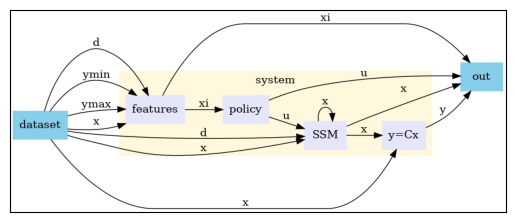

In [27]:
import neuromancer.psl as psl
from neuromancer.system import Node, System
from neuromancer.modules import blocks
from neuromancer.modules.activations import activations
from neuromancer.dataset import DictDataset
from neuromancer.constraint import variable
from neuromancer.loss import PenaltyLoss
from neuromancer.problem import Problem
from neuromancer.trainer import Trainer


# state-space model of the building dynamics:
#   x_k+1 =  A x_k + B u_k + E d_k
xnext = lambda x, u, d: x @ problem_specs["A"].T + u @ problem_specs["B"].T + d @ problem_specs["E"].T
state_model = Node(xnext, ['x', 'u', 'd'], ['x'], name='SSM')
#   y_k = C x_k
ynext = lambda x: x @ problem_specs["C"].T
output_model = Node(ynext, ['x'], ['y'], name='y=Cx')

# get normalization layer to generate policy features
def normalize_features(*inputs):
    x = torch.cat(inputs, dim=-1)
    return (x - data_stats["means"]) / data_stats["stds"]

# features node
features = Node(normalize_features, ['x', 'ymin', 'ymax', 'd'],
                ['xi'], name='features')

# neural net control policy
net = blocks.MLP_bounds(insize=problem_specs["nx"] + 2 * problem_specs["nref"] + problem_specs["nd"],
                        outsize=problem_specs["nu"], hsizes=[32, 32],
                        nonlin=activations['gelu'],
                        min=problem_specs["umin"], max=problem_specs["umax"])
# symbolic policy
policy = Node(net, ['xi'], ['u'], name='policy')

# closed-loop system model
cl_system = System([features, policy, state_model, output_model],
                   nsteps=nsteps,
                   name='cl_system')
cl_system.show()


### Differentiable Predictive Control objectives and constraints

Here we take advantage of Neuromancer's high level symbolic language to define objective and constraint terms of our optimal control problem.



In [28]:
# variables
y = variable('y')
u = variable('u')
ymin = variable('ymin')
ymax = variable('ymax')

# objectives
action_loss = 0.01 * (u == 0.0)  # energy minimization
du_loss = 0.1 * (u[:,:-1,:] - u[:,1:,:] == 0.0)  # delta u minimization

# # constraints
state_lower_bound_penalty = 50.*(y > ymin)
state_upper_bound_penalty = 50.*(y < ymax)

# # objectives and constraints names for nicer plot
action_loss.name = 'action_loss'
du_loss.name = 'du_loss'
state_lower_bound_penalty.name = 'x_min'
state_upper_bound_penalty.name = 'x_max'

# list of constraints and objectives
objectives = [action_loss, du_loss]
constraints = [
    state_lower_bound_penalty,
    state_upper_bound_penalty
]


### Differentiable optimal control problem

Here we put things together to construct a differentibale optimal control problem.


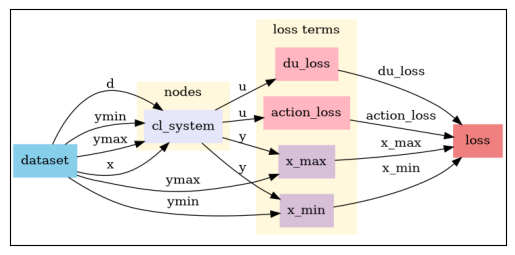

In [29]:
# data -> parameters (xi_k) -> policy (u_k) -> dynamics (x_k+1)
nodes = [cl_system]

# create constrained optimization loss
loss = PenaltyLoss(objectives, constraints)

# construct constrained optimization problem
problem = Problem(nodes, loss)

# plot computational graph
problem.show()


### Solving the problem

We solve the problem using stochastic gradient descent over pre-defined training data of sampled parameters.


In [30]:
epochs = 300
optimizer = torch.optim.AdamW(problem.parameters(), lr=0.001)
#  Neuromancer trainer
trainer = Trainer(
    problem,
    data_loader["train_loader"], data_loader["dev_loader"],
    optimizer=optimizer,
    epochs=epochs,
    train_metric='train_loss',
    eval_metric='dev_loss',
    warmup=epochs,
    patience=5,
)
start_time = time.time()
# Train control policy
best_model = trainer.train()
# load best trained model
trainer.model.load_state_dict(best_model)

print(f"Pure Training Time: {time.time() - start_time:.2f}s")

/home/alireza/neuromancer/neuromancer/neuromancer_RL/src/neuromancer/constraint.py:169: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(left, right)
/home/alireza/neuromancer/neuromancer/neuromancer_RL/src/neuromancer/constraint.py:169: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 99, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(left, right)


epoch: 0  train_loss: 67.23876953125
epoch: 1  train_loss: 62.0628776550293
epoch: 2  train_loss: 56.80132293701172
epoch: 3  train_loss: 50.8159065246582
epoch: 4  train_loss: 43.88370895385742
epoch: 5  train_loss: 36.626129150390625
epoch: 6  train_loss: 30.3054141998291
epoch: 7  train_loss: 25.897287368774414
epoch: 8  train_loss: 23.250629425048828
epoch: 9  train_loss: 21.73172378540039
epoch: 10  train_loss: 20.75401496887207
epoch: 11  train_loss: 20.03668785095215
epoch: 12  train_loss: 19.469663619995117
epoch: 13  train_loss: 19.01753044128418
epoch: 14  train_loss: 18.657007217407227
epoch: 15  train_loss: 18.359905242919922
epoch: 16  train_loss: 18.109119415283203
epoch: 17  train_loss: 17.897560119628906
epoch: 18  train_loss: 17.719249725341797
epoch: 19  train_loss: 17.569652557373047
epoch: 20  train_loss: 17.437997817993164
epoch: 21  train_loss: 17.319210052490234
epoch: 22  train_loss: 17.208690643310547
epoch: 23  train_loss: 17.104534149169922
epoch: 24  train_l

### Compute DPC Costs `(calculate_dpc_costs)`

This function calculates the **operational cost** and **constraint violation cost** for a given trajectory.

- **Operational Cost**: Summed over all control actions and scaled to reflect energy usage.
- **Violation Cost**: Penalizes deviations from temperature constraints by applying a weighted penalty when the temperature exceeds the upper or lower bounds.


In [46]:
def calculate_dpc_costs(trajectories):
    """Compute operational and violation costs from a trajectory."""
    temp_min, temp_max = trajectories["ymin"][0].clone().detach(), trajectories["ymax"][0].clone().detach()
    dpc_operational_cost = sum(u.item() for u in trajectories['u'][0]) * 0.01

    dpc_violation_cost = sum(
        50 * max(temp_min[i].item() - y.item(), 0) +
        50 * max(y.item() - temp_max[i].item(), 0)
        for i, y in enumerate(trajectories['y'][0][:-1])
    )

    return dpc_operational_cost, dpc_violation_cost


### Evaluating DPC over Dev Data

This function evaluates the trained DPC on a given dataset by computing the **average operational cost** and **average constraint violation cost** across multiple samples.

#### Process:
1. **Iterates through all samples** in the dataset.
2. **Prepares input data** for each sample, including initial state, disturbance, and reference bounds.
3. **Runs closed-loop simulations** for each sample.
4. **Computes costs** for each trajectory using the **operational cost** (energy usage) and **violation cost** (penalties for exceeding constraints).
5. **Averages costs** over all samples to assess the overall efficiency and constraint adherence of the control policy.

#### Output:
- **Average Operational Cost**
- **Average Violation Cost**

In [49]:
def evaluate_dpc(dpc, data):
    total_operational_cost = 0.0
    total_violation_cost = 0.0
    num_samples = len(data)

    for idx, sample in enumerate(data):
        # Prepare sample data
        x0 = sample['x'].unsqueeze(dim=0)
        ymin = sample['ymin'].unsqueeze(dim=0)
        ymax = sample['ymax'].unsqueeze(dim=0)
        d = sample['d'].unsqueeze(dim=0)
        nsteps = len(sample['ymin'])

        sample_data = {
            'x': x0,
            'y': x0[:, :, [-1]],
            'ymin': ymin,
            'ymax': ymax,
            'd': d
        }

        # Set the simulation steps
        dpc.nsteps = nsteps

        # Perform closed-loop simulation
        trajectories = dpc(sample_data)

        # Compute costs for the current trajectory
        operational_cost, violation_cost = calculate_dpc_costs(trajectories)
        
        # Accumulate total costs
        total_operational_cost += operational_cost
        total_violation_cost += violation_cost

    # Compute average costs
    avg_operational_cost = total_operational_cost / num_samples
    avg_violation_cost = total_violation_cost / num_samples

    return avg_operational_cost, avg_violation_cost


In [55]:
dpc_operational_cost, dpc_violation_cost = evaluate_dpc(cl_system, data['dev_data'])
rl_operational_cost, rl_violation_cost = evaluate_policy(agent, dev_env)

print(f"DPC Average Operational Cost on Dev Data: {dpc_operational_cost:.2f}")
print(f"RL Average Operational Cost on Dev Data: {-rl_operational_cost:.2f}")
print(f"DPC Average Violation Cost on Dev Data: {dpc_violation_cost:.2f}")
print(f"RL Average Violation Cost on Dev Data: {rl_violation_cost:.2f}")

DPC Average Operational Cost on Dev Data: 946.77
RL Average Operational Cost on Dev Data: 960.80
DPC Average Violation Cost on Dev Data: 415.52
RL Average Violation Cost on Dev Data: 267.73


### DPC vs RL Rollout Simulation



In [108]:
nsteps_test = 1000
sys = psl.systems['LinearSimpleSingleZone']()
# generate reference
np_refs = psl.signals.step(nsteps_test+1, 1, min=18., max=22., randsteps=5)
ymin_val = torch.tensor(np_refs, dtype=torch.float32).reshape(1, nsteps_test+1, 1)
ymax_val = ymin_val+2.0
# generate disturbance signal
torch_dist = torch.tensor(sys.get_D(nsteps_test+1)).unsqueeze(0)
# initial data for closed loop simulation
x0 = torch.tensor(sys.get_x0()).reshape(1, 1, problem_specs["nx"])
inf_data = {'x': x0,
        'y': x0[:, :, [-1]],
        'ymin': ymin_val,
        'ymax': ymax_val,
        'd': torch_dist}

train_env.reset()
outputs = train_env.inference(inf_data, agent)

cl_system.nsteps = nsteps_test
# perform closed-loop simulation
trajectories = cl_system(inf_data)



In [109]:
import matplotlib.pyplot as plt

def visualize_results(rl_outputs, dpc_trajectories, inf_data):
    
    # Temperature Control Plot
    plt.figure(figsize=(20, 5))
    plt.plot([temp[0][0].item() for temp in rl_outputs['y']], label="Controlled Temp (RL)", color='blue', linestyle='-', linewidth=4, alpha=0.7)
    plt.plot([temp[0].cpu().detach() for temp in dpc_trajectories['y'][0]], label="Controlled Temp (DPC)", color='red', linestyle='-', linewidth=4, alpha=0.7)

    time_steps = np.arange(len(inf_data['ymin'][0]) - 1)
    plt.step(time_steps, np.ravel(inf_data['ymin'][0][:-1]), where='post', label="Min Temp Bound", color='green', linestyle='--', linewidth=2)
    plt.step(time_steps, np.ravel(inf_data['ymax'][0][:-1]), where='post', label="Max Temp Bound", color='orange', linestyle='--', linewidth=2)
    plt.fill_between(time_steps, np.ravel(inf_data['ymin'][0][:-1]), np.ravel(inf_data['ymax'][0][:-1]),
                     color='yellow', alpha=0.3, label='Valid Temp Range')

    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.title("Controlled Zone Temperature (RL vs. DPC)", fontsize=18)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()


    # Plot RL and DPC actions
    plt.figure(figsize=(20, 5))
    plt.plot([(action[0][0].item()) for action in rl_outputs['u']], label="Actions (RL)", color='blue', linestyle='-', linewidth=4, alpha=0.7)
    plt.plot([action.cpu().detach() for action in dpc_trajectories['u'][0]], label="Actions (DPC)", color='red', linestyle='-', linewidth=4, alpha=0.7)

    plt.ylim(0, problem_specs['umax'].numpy())
    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Actions (Scaled)", fontsize=14)
    plt.title("Actions Taken (RL vs. DPC)", fontsize=18)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='upper right')
    plt.tight_layout()


    # Plot disturbances
    plt.figure(figsize=(20, 5))
    plt.plot(inf_data["d"][0][:,0].numpy(), label="Outdoor Air Temp", color='red', linestyle='-', linewidth=4)
    plt.plot(inf_data["d"][0][:,1].numpy(), label="Occupant Heat Load", color='green', linestyle='-', linewidth=4)
    plt.plot(inf_data["d"][0][:,2].numpy(), label="Solar Radiation", color='blue', linestyle='-', linewidth=4)

    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Disturbances", fontsize=14)
    plt.title("External Disturbances Over Time", fontsize=18)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='upper right')
    plt.tight_layout()

    plt.show()

    #Calculate operational cost and violations
    rl_operational_cost = -1 * sum(rl_outputs["rewards"]).item()
    rl_violation_cost = sum(rl_outputs["costs"]).item()

    dpc_operational_cost, dpc_violation_cost = calculate_dpc_costs(dpc_trajectories)
    # Bar plot for costs with dual axes
    labels = ['Operational Cost', 'Violation Cost']
    rl_costs = [rl_operational_cost, rl_violation_cost]
    dpc_costs = [dpc_operational_cost, dpc_violation_cost]

    x = np.arange(len(labels))
    width = 0.2

    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot operational costs on the left y-axis
    bars_rl = ax1.bar(x - width/2, rl_costs, width, label='RL', color='blue', alpha=0.7)
    bars_dpc = ax1.bar(x + width/2, dpc_costs, width, label='DPC', color='red', alpha=0.7)
    ax1.set_ylabel('Operational Cost', fontsize=14)
    ax1.set_ylim(0, max(rl_operational_cost, dpc_operational_cost) * 1.2)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=12)
    ax1.set_title('Cost Comparison: RL vs. DPC', fontsize=16)

    # Add a secondary y-axis for violation costs
    ax2 = ax1.twinx()
    ax2.set_ylabel('Violation Cost', fontsize=14)
    ax2.set_ylim(0, max(rl_violation_cost, dpc_violation_cost) * 1.2)

    # Add the violation costs as bars but differentiate them visually
    bars_rl_violation = ax2.bar(x - width/2, [0, rl_violation_cost], width, label='RL Violation', color='darkblue', alpha=0.5, hatch='//')
    bars_dpc_violation = ax2.bar(x + width/2, [0, dpc_violation_cost], width, label='DPC Violation', color='darkred', alpha=0.5, hatch='//')

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.show()

    print("=== Cost Analysis ===")
    print(f"RL Operational Cost: {rl_operational_cost:.2f}")
    print(f"DPC Operational Cost: {dpc_operational_cost:.2f}")
    print(f"RL Constraint Violation Cost: {rl_violation_cost:.2f}")
    print(f"DPC Constraint Violation Cost: {dpc_violation_cost:.2f}")

/home/alireza/anaconda3/envs/neuromancer/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/alireza/anaconda3/envs/neuromancer/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


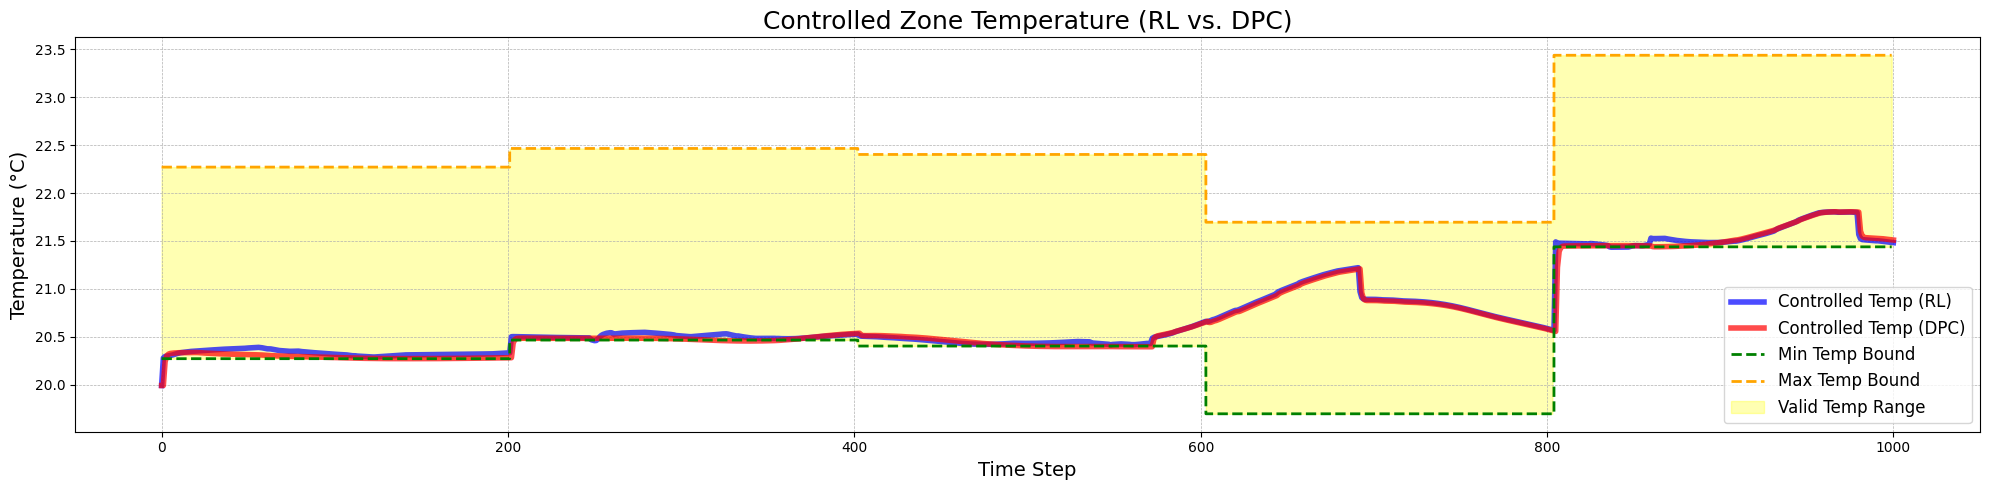

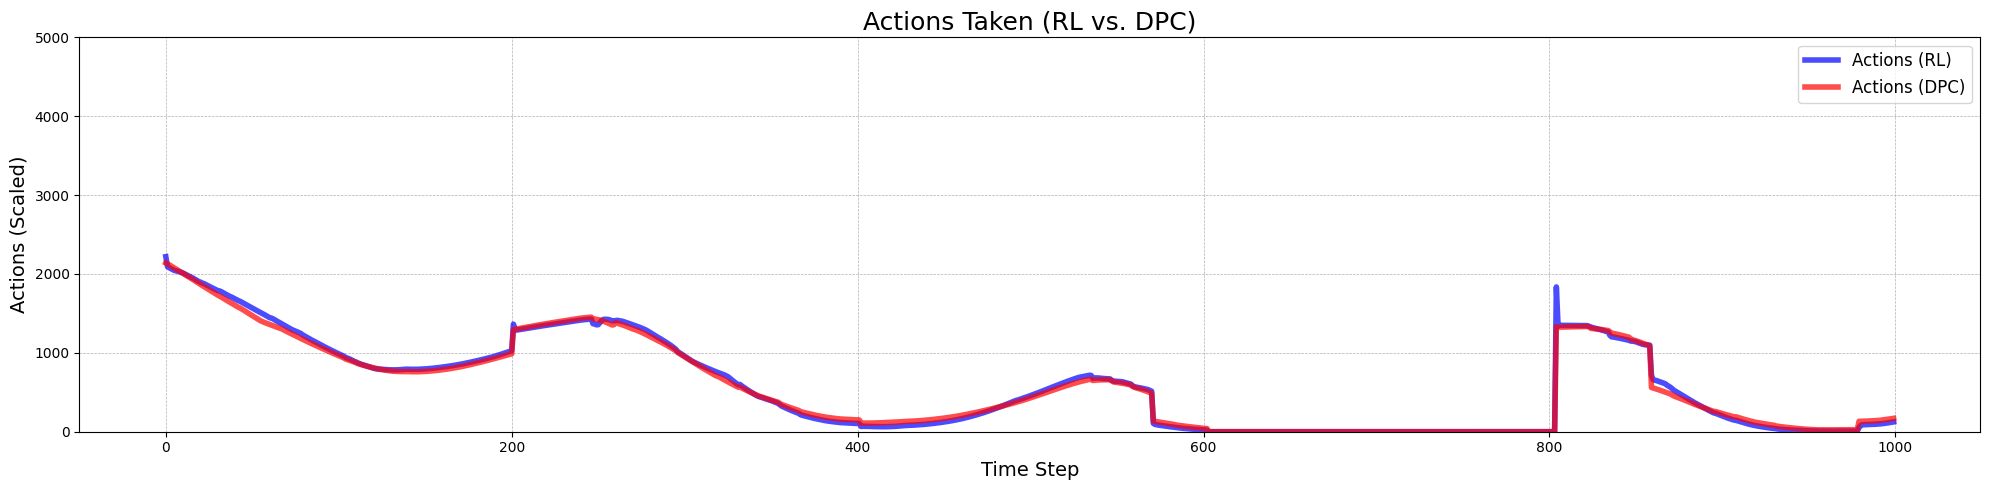

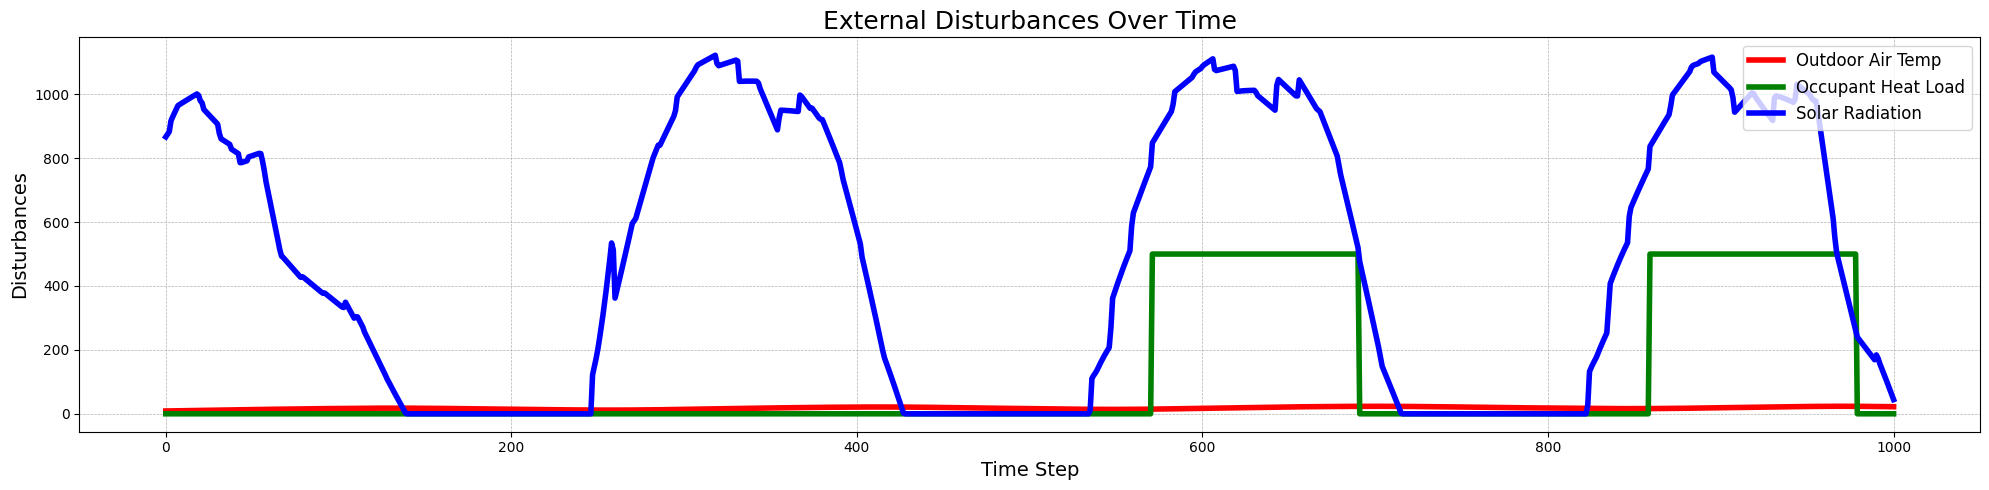

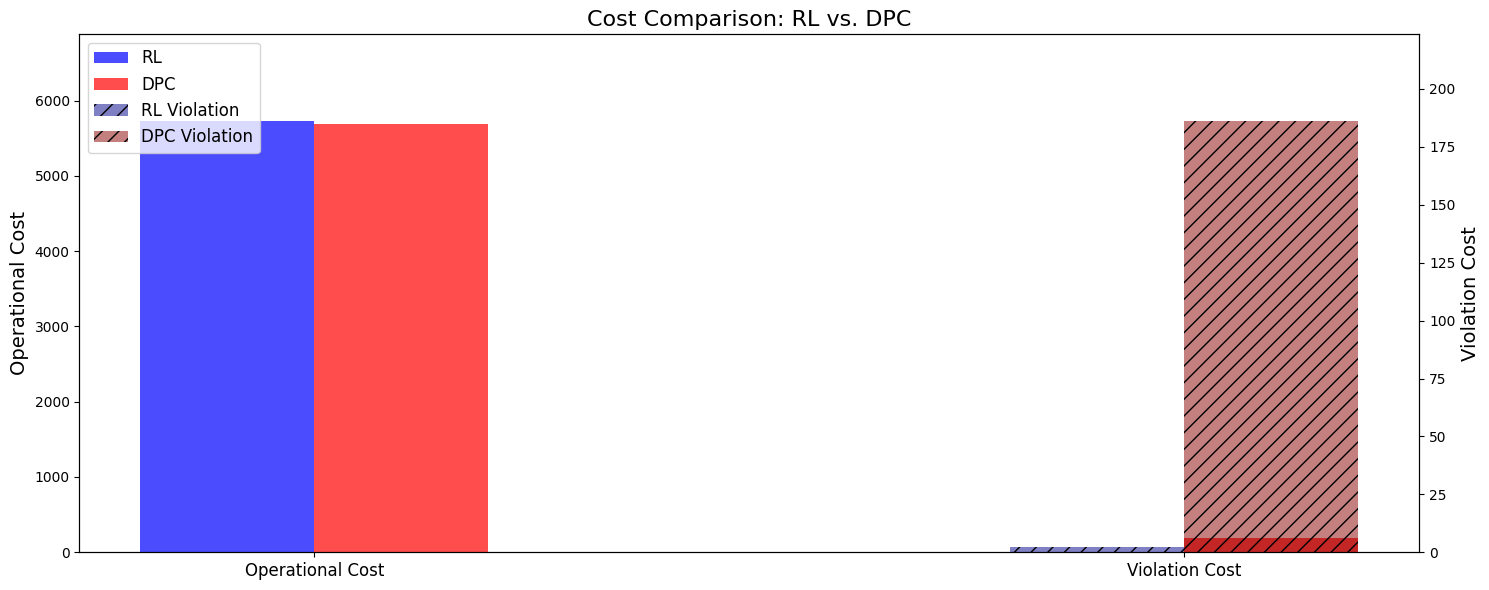

=== Cost Analysis ===
RL Operational Cost: 5732.48
DPC Operational Cost: 5690.33
RL Constraint Violation Cost: 2.42
DPC Constraint Violation Cost: 186.32


In [110]:
visualize_results(outputs, trajectories, inf_data)